# Statistical Hypothesis Testing and MCMC 

## Statistical Hypothesis testing of the yelper stars

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

In [2]:
yelp_user=pd.read_csv('C:\\Users\\rohan\\challenge\\yelp_user.csv',sep=',')
yelp_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [4]:
reviews_analysis=yelp_user[['user_id','yelping_since','average_stars']]
reviews_analysis.head()

,user_id,yelping_since,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24,3.70
1,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02,2.00
2,mBneaEEH5EMyxaVyqS-72A,2015-03-13,4.67
3,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08,4.67
4,4E8--zUZO1Rr1IBK4_83fg,2012-07-16,3.45


In [5]:
reviews_analysis.isnull().values.any()

False

In [8]:
New_users=reviews_analysis.loc[(reviews_analysis['yelping_since'] > '2016-01-01')]
New_users.head()

,user_id,yelping_since,average_stars
1,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02,2.00
3,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08,4.67
10,WRae-wZkpRoxMrgJdqwyxg,2017-11-29,5.00
11,Mmv5fPxbF8XEMN4EPT_Khg,2016-06-24,1.67
14,V--GjQPlTpeWbcB2cS06Gw,2017-10-24,3.00


In [9]:
Old_users=reviews_analysis.loc[(reviews_analysis['yelping_since'] < '2016-01-01')]
Old_users.head()

,user_id,yelping_since,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24,3.70
2,mBneaEEH5EMyxaVyqS-72A,2015-03-13,4.67
4,4E8--zUZO1Rr1IBK4_83fg,2012-07-16,3.45
5,Ob-2oGBQ7rwwYwUvhmnf7g,2012-05-01,4.78
6,JaTVvKsBl0bHHJEpESn4pQ,2013-03-23,5.00


In [11]:
New_users["average_stars"].mean()


3.6913265697297337

In [12]:
Old_users["average_stars"].mean()

3.7148497684152932

In [13]:
import scipy.stats as stats
stats.ttest_ind(a= New_users.average_stars,
                b= Old_users.average_stars,
                equal_var=False)  

Ttest_indResult(statistic=-7.526521305107032, pvalue=5.22656993930623e-14)

## Estimating a model

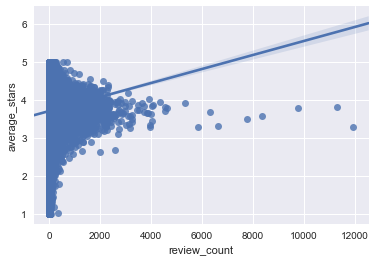

In [15]:
sns.regplot(x='review_count',y='average_stars',data=yelp_user)

In [16]:
star_count=yelp_user[['review_count','average_stars']]
star_count.head()

,review_count,average_stars
0,10,3.70
1,1,2.00
2,6,4.67
3,3,4.67
4,11,3.45


In [19]:
star_count_grouped=star_count.groupby(["review_count"]).mean()
star_count_grouped.head()

,average_stars
review_count,
0,3.865896
1,3.577236
2,3.681532
3,3.706930
4,3.721969


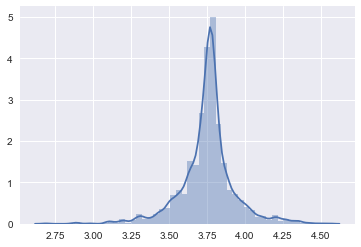

In [21]:
sns.distplot(star_count_grouped)

In [22]:
mu=star_count_grouped["average_stars"].mean()
sig=star_count_grouped["average_stars"].std()
mu


3.75348532682819

## MCMC Sampling

### Estimating the normal distribution of review_count- average_stars model

Progress: [##############################] 10000 of 10000 samples


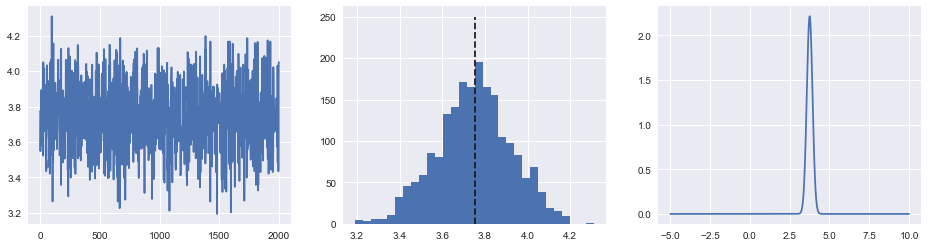

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import sampyl as smp
from sampyl import np
import math

# Autograd throws some warnings that are useful, but this is
# a demonstration, let's squelch them
import warnings
warnings.filterwarnings('ignore')

mu, sig = mu, sig
def logp(x):
    return  -np.log(sig) - (x - mu)**2/(2*sig**2)

def gaussian(x):
    return (1. / (sig * math.sqrt(2 * math.pi))) * math.exp((-(x - mu)**2)/(2 * sig**2))

start = smp.find_MAP(logp, {'x':1.})
metro = smp.Metropolis(logp, start)
chain = metro(10000, burn=2000, thin=4)

xs = np.linspace(-5, 10, num=2000)
normald = [gaussian(x) for x in xs]

fig, axes = plt.subplots(figsize=(16,4),ncols=3)
for i, ax in enumerate(axes):
    if (i == 0):
        ax.plot(chain.x)
    elif (i == 1):
        ax.hist(chain.x, bins=30)
        ax.vlines(mu, 0, 250, linestyles='--')
    else:
        ax.plot(xs, normald)

### Estimating a model based on the data with histogram expected to match normal distribution

Progress: [##############################] 10000 of 10000 samples
exact values:
3.75348532682819 0.18031278127365452
estimated values:
3.7471755490617675 0.18142220936635675


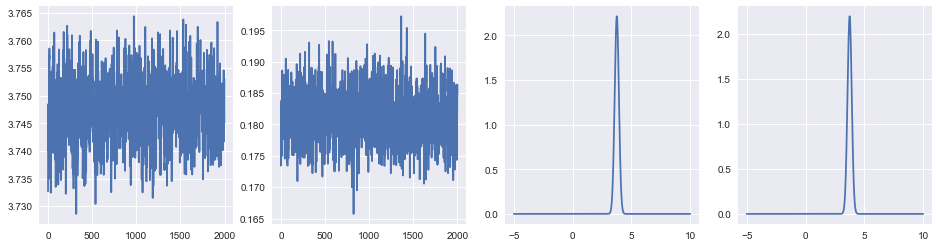

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import sampyl as smp
from sampyl import np
import math

# Autograd throws some warnings that are useful, but this is
# a demonstration, let's squelch them
import warnings
warnings.filterwarnings('ignore')

mu_r, sig_r = mu,sig
data = np.random.normal(mu_r, sig_r, 1000)

def gaussian(x, m, s):
    return (1. / (s * math.sqrt(2 * math.pi))) * math.exp((-(x - m)**2)/(2 * s**2))

# Define the log-P function here
def logp(mu_p, sig_p):
    model = smp.Model()
    
    # Normal log-likelihood
    model.add(smp.normal(data, mu=mu_p, sig=sig_p))

    # Exponential log-priors for parameters
    model.add(smp.exponential(mu_p), smp.exponential(sig_p))
    
    return model()

start = smp.find_MAP(logp, {'mu_p':1., 'sig_p':1.})
metro = smp.Metropolis(logp, start)
chain = metro(10000, burn=2000, thin=4)
print('exact values:')
print(mu_r, sig_r)
print('estimated values:')
print(chain.mu_p.mean(), chain.sig_p.mean())

xs = np.linspace(-5, 10, num=2000)
exact = [gaussian(x, mu_r, sig_r) for x in xs]
estimated = [gaussian(x, chain.mu_p.mean(), chain.sig_p.mean()) for x in xs]

fig, axes = plt.subplots(figsize=(16,4),ncols=4)
for i, ax in enumerate(axes):
    if (i == 0):
        ax.plot(chain.mu_p)
    elif (i == 1):
        ax.plot(chain.sig_p)
    elif (i == 2):
        ax.plot(xs, exact)
    elif (i -- 3):
        ax.plot(xs, estimated)
